# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize period)

In [1]:
# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
#start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define the periods

In [4]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    _, strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [6]:
metrics = ('start',
           'ending_balance',
           'annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'trades_per_year',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
start,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-11-11,1993-12-17,1994-01-24,1994-03-01,1994-04-06,1994-05-12,1994-06-17,1994-07-25,1994-08-29,1994-10-04,1994-11-08,1994-12-14,1995-01-20
ending_balance,48413.56,53009.21,38680.23,35590.95,37227.29,36080.66,41230.85,45687.31,46106.61,45389.59,52222.30,61358.77,62076.85,80111.09,81258.74,79227.34,71982.56,70411.71,65207.74
annual_return_rate,6.11,6.48,5.22,4.89,5.07,4.95,5.48,5.91,5.97,5.93,6.52,7.20,7.28,8.37,8.47,8.39,8.02,7.96,7.67
max_closed_out_drawdown,-40.56,-37.21,-46.22,-43.22,-39.79,-35.73,-28.66,-23.96,-23.13,-25.89,-25.44,-23.21,-27.34,-25.88,-24.14,-26.99,-31.20,-29.41,-29.72
drawdown_annualized_return,-6.63,-5.74,-8.85,-8.83,-7.85,-7.22,-5.23,-4.06,-3.88,-4.37,-3.90,-3.22,-3.75,-3.09,-2.85,-3.22,-3.89,-3.69,-3.88
drawdown_recovery,-3.71,-3.73,-3.75,-3.75,-3.75,-3.75,-3.75,-3.75,-3.06,-0.21,-0.67,-0.21,-0.22,-0.24,-0.25,-0.63,-0.64,-0.64,-0.64
best_month,12.92,12.95,15.05,14.98,15.04,15.03,12.95,12.94,12.95,12.96,12.96,15.15,15.13,15.15,15.80,15.75,17.77,17.78,17.76
worst_month,-17.37,-17.39,-17.40,-17.36,-17.39,-17.38,-17.37,-17.36,-18.75,-17.22,-18.91,-18.89,-18.92,-18.94,-18.94,-18.90,-20.79,-20.79,-22.86
sharpe_ratio,0.52,0.56,0.47,0.45,0.47,0.47,0.51,0.54,0.54,0.52,0.56,0.60,0.60,0.67,0.67,0.66,0.63,0.63,0.60
sortino_ratio,0.62,0.66,0.54,0.51,0.53,0.52,0.57,0.61,0.61,0.59,0.63,0.69,0.69,0.78,0.79,0.77,0.74,0.73,0.70


Bar graphs

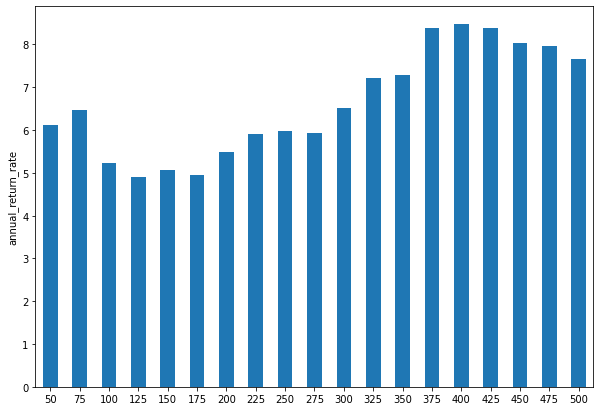

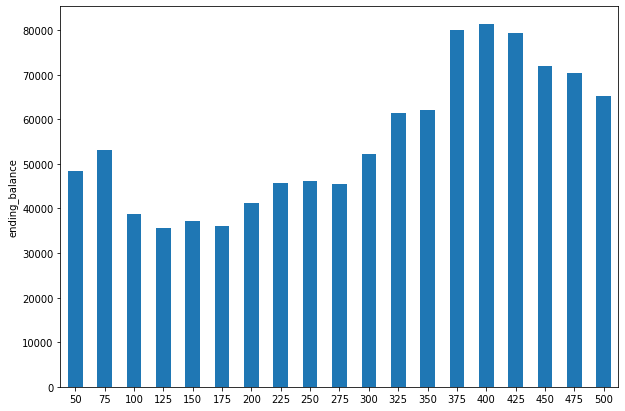

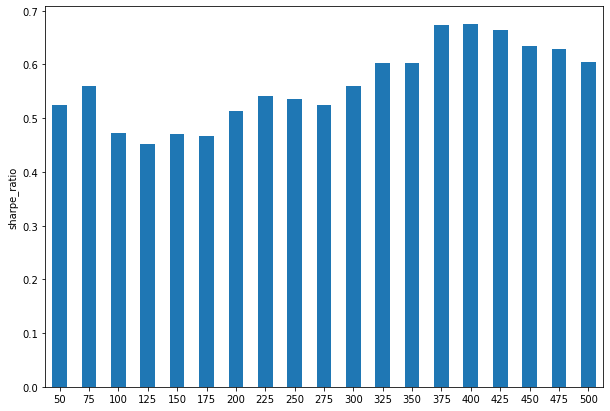

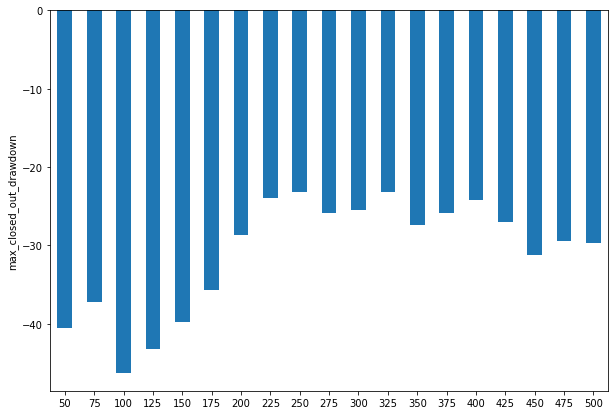

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-06-08 00:00:00 SELL 215 SPY @ 323.20


Equity curve

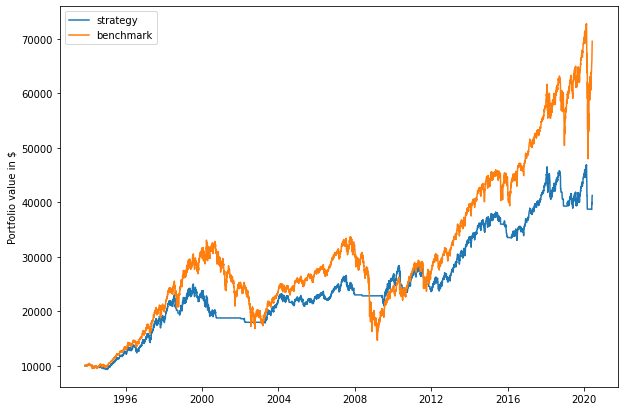

In [9]:
pf.plot_equity_curve(strategies['200'].dbal, benchmark=benchmark.dbal)